## **STOCK MARKET PREDICTION**

Importing the libraries

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import style
style.use("fivethirtyeight")

Read the csv file into a DataFrame

In [ ]:
df = pd.read_csv(r"tesla.csv")

In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
5,7/7/2010,16.400000,16.629999,14.980000,15.800000,6921700,15.800000
6,7/8/2010,16.139999,17.520000,15.570000,17.459999,7711400,17.459999
7,7/9/2010,17.580000,17.900000,16.549999,17.400000,4050600,17.400000
8,7/12/2010,17.950001,18.070000,17.000000,17.049999,2202500,17.049999
9,7/13/2010,17.389999,18.639999,16.900000,18.139999,2680100,18.139999


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [ ]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

Make two new columns which will be used for making predictions.

In [ ]:
df["HL_Perc"] = (df["High"]-df["Low"]) / df["Low"] * 100
df["CO_Perc"] = (df["Close"] - df["Open"]) / df["Open"] * 100

In [ ]:
dates = np.array(df["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [ ]:
df = df[["HL_Perc", "CO_Perc", "Adj Close", "Volume"]]

Define the label column

In [ ]:
df["PriceNextMonth"] = df["Adj Close"].shift(-30)

In [ ]:
df.tail(10)

,HL_Perc,CO_Perc,Adj Close,Volume,PriceNextMonth
1682,1.692862,1.331129,251.210007,3351200,NaN
1683,2.243070,-1.321849,248.589996,3449200,NaN
1684,1.936246,-0.052634,246.869995,3725200,NaN
1685,2.329220,-1.102456,244.899994,3861500,NaN
1686,1.440329,-1.023519,243.690002,3057000,NaN
1687,1.676418,0.551422,246.169998,3010700,NaN
1688,4.918296,4.831173,258.000000,7575500,NaN
1689,2.646791,-0.494165,255.729996,4816600,NaN
1690,2.582414,-0.133386,262.049988,7100400,NaN
1691,1.581154,-0.946970,261.500000,6475900,NaN


Make fetaure and label arrays 

In [ ]:
X = np.array(df.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
df.dropna(inplace = True)
y = np.array(df["PriceNextMonth"])

<ipython-input-14-383e8e913f7f>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(["PriceNextMonth"], 1))


Divide the data set into training data and testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

Define the prediction model

In [ ]:
model = RandomForestRegressor()

Fit the model using training data

In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor()

Calculate the confidence value by applying the model to testing data

In [ ]:
conf = model.score(X_test, y_test)
print(conf)

0.9599554504935848


Fit the model again using the whole data set

In [ ]:
model.fit(X,y)

RandomForestRegressor()

In [ ]:
predictions = model.predict(X_Check)

Make the final DataFrame containing Dates, ClosePrices, and Forecast values

In [ ]:
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = df["Adj Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)

Plotting the final results

Text(0, 0.5, 'Price')

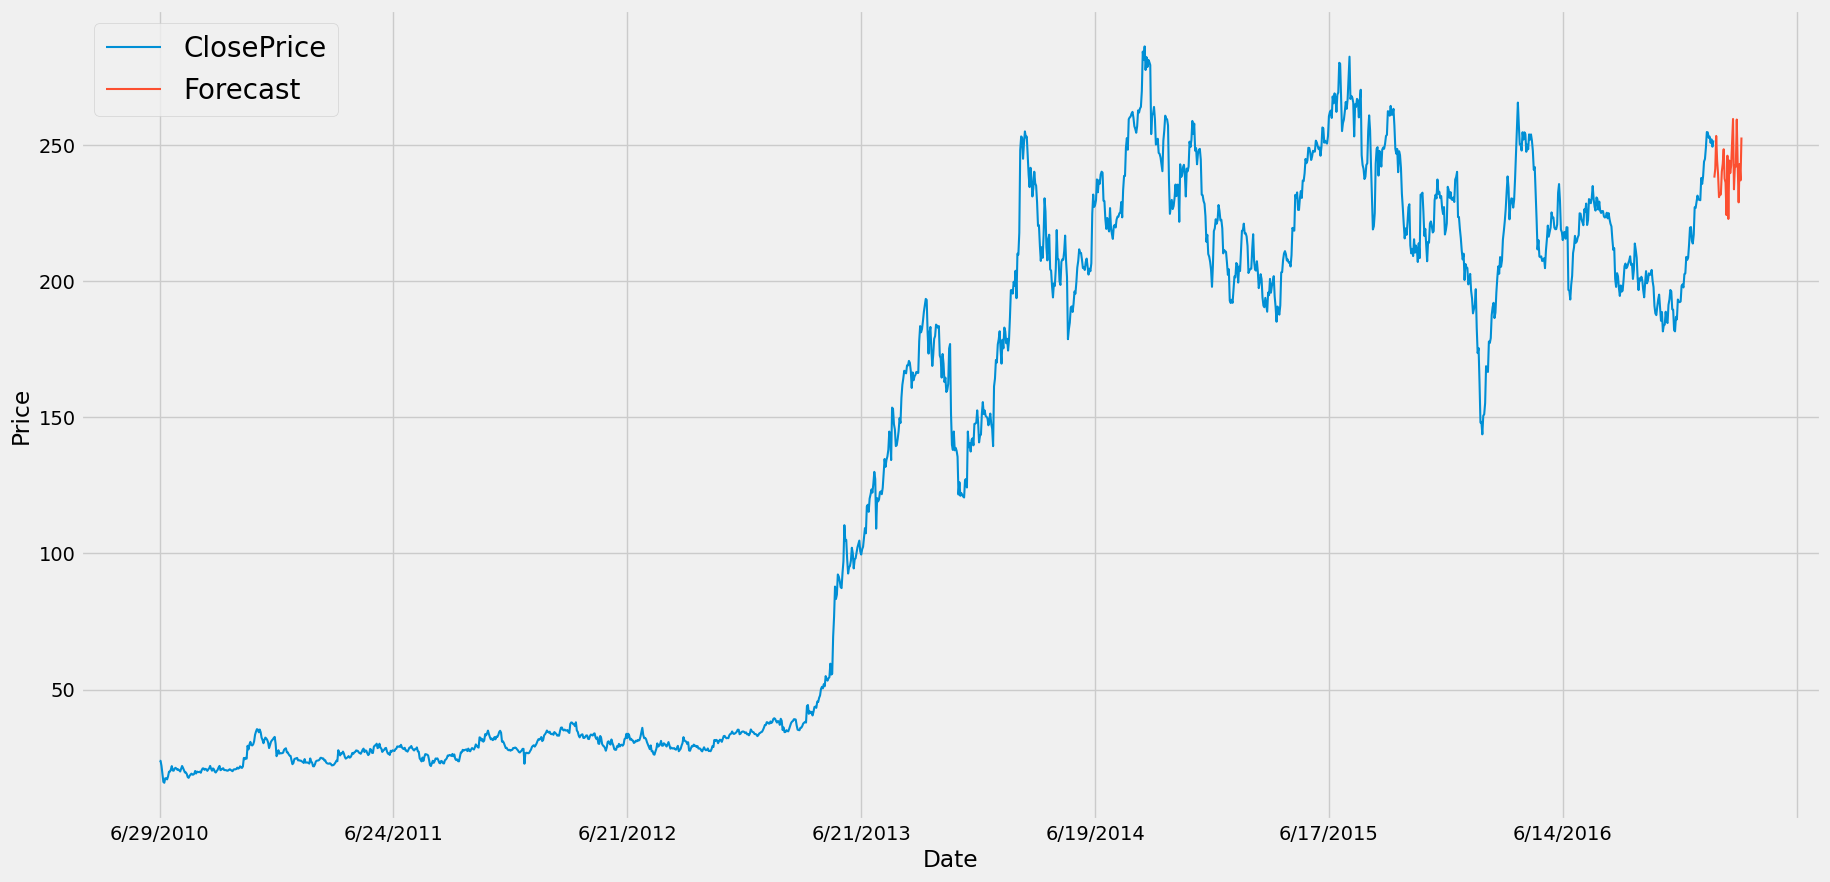

In [ ]:
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')